Here we will try to simulate 3 qubit and 4 qubit interactions with only single and two qubit interactions

We only need the interactions to simulate
$\sigma_{z}\otimes \sigma_{z}\otimes \sigma_{z}$, $\sigma_{z}\otimes \sigma_{z}\otimes \sigma_{x}$ and $\sigma_{z}\otimes \sigma_{z}\otimes \sigma_{z}\otimes \sigma_{x}$.


Out of these the 2nd one is included in the hamiltonian of toffoli so no need to do that so only $1^{st}$ and $3^{rd}$ have to be done.

In [1]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
import skquant.opt as skqopt #optimization routines
from scipy.linalg import expm

In [32]:
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
Y = np.array([[0,-1j],[1j, 0]])
dev1 = qml.device('default.qubit', wires=3)

# Hamiltonian for Toffoli
def hamiltonian_matrix1():
    H=np.pi/4*np.kron(np.kron(Z,Z),X) 
    
    return expm(-1j*H)

In [48]:
U=hamiltonian_matrix1()
U

array([[ 0.70710678+0.j        , -0.        -0.70710678j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.        -0.70710678j,  0.70710678+0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.70710678+0.j        ,  0.        +0.70710678j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.70710678j,  0.70710678+0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0

In [54]:
np.eye(8)/np.sqrt(2)-1j*np.kron(np.kron(Z,Z),X)/np.sqrt(2)

tensor([[0.70710678+0.j        , 0.        -0.70710678j,
         0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.        +0.j        ],
        [0.        -0.70710678j, 0.70710678+0.j        ,
         0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.        +0.j        ],
        [0.        +0.j        , 0.        +0.j        ,
         0.70710678+0.j        , 0.        +0.70710678j,
         0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.        +0.j        ],
        [0.        +0.j        , 0.        +0.j        ,
         0.        +0.70710678j, 0.70710678+0.j        ,
         0.        +0.j        , 0.        +0.j        ,
         0.        +0.j        , 0.        +0.j        ],
        [0.        +0.j        , 0.        +0.j        ,
         0.        +0.j    

In [64]:
np.eye(8)/np.sqrt(2)-1j*np.kron(np.kron(Z,Z),X)/np.sqrt(2)==U

tensor([[False,  True,  True,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True,  True,  True],
        [ True,  True, False,  True,  True,  True,  True,  True],
        [ True,  True, False, False,  True,  True,  True,  True],
        [ True,  True,  True,  True, False,  True,  True,  True],
        [ True,  True,  True,  True, False, False,  True,  True],
        [ True,  True,  True,  True,  True,  True, False,  True],
        [ True,  True,  True,  True,  True,  True, False, False]], requires_grad=True)

In [34]:

#@qml.qnode(dev)
def ansatz(params):
    l=params
    '''
    #H=I⊗I⊗Z
    qml.RZ(l[0],wires=2)
    
    #H=Z⊗I⊗Z
    qml.CNOT(wires=[0,2])
    qml.RZ(l[1],wires=2)
    qml.CNOT(wires=[0,2])
    
    # circuit for local ham H=I⊗Z⊗Z
    qml.CNOT(wires=[1,2])
    qml.RZ(l[2],wires=2)
    qml.CNOT(wires=[1,2])
    '''
    '''
    # circuit for local ham H=X⊗X⊗I  
    [qml.Hadamard(wires=i) for i in range(0,2)]
    qml.CNOT(wires=[0,1])
    qml.RZ(l[0],wires=1)
    qml.CNOT(wires=[0,1])
    [qml.Hadamard(wires=i) for i in range(0,2)]
    

     # circuit for local ham H=Y⊗Y⊗I
    [qml.RX(np.pi/2,wires=i) for i in range(0,2)]
    qml.CNOT(wires=[0,1])
    qml.RZ(l[1],wires=1)
    qml.CNOT(wires=[0,1])
    [qml.RX(-np.pi/2,wires=i) for i in range(0,2)]

    
    #H=Z⊗Z⊗I
    qml.CNOT(wires=[0,1])
    qml.RZ(l[2],wires=1)
    qml.CNOT(wires=[0,1])

    #Z⊗I⊗I
    qml.RZ(l[3],wires=0)
   
    #I⊗Z⊗I
    qml.RZ(l[4],wires=1)
    
    #I⊗I⊗X
    qml.RX(l[5],wires=2)
    
    #I⊗X⊗I
    qml.RX(l[6],wires=1)
    
    #X⊗I⊗I
    qml.RX(l[7],wires=0)
    
    # circuit for local ham H=X⊗I⊗X
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[0,2])
    qml.RZ(l[8],wires=2)
    qml.CNOT(wires=[0,2])
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    
    # circuit for local ham H=I⊗X⊗X
    [qml.Hadamard(wires=i) for i in range(1,3)]
    qml.CNOT(wires=[1,2])
    qml.RZ(l[9],wires=2)
    qml.CNOT(wires=[1,2])
    [qml.Hadamard(wires=i) for i in range(1,3)]
    
    
    qml.Hadamard(wires=2)
    qml.IsingZZ(l[10],wires=[0,2])
    qml.Hadamard(wires=2)
    
    qml.Hadamard(wires=2)
    qml.IsingZZ(l[11],wires=[1,2])
    qml.Hadamard(wires=2)
    '''
    qml.IsingZZ(l[0],wires=[0,2])
    qml.IsingZZ(l[1],wires=[1,2])
    
    qml.IsingXX(l[2],wires=[0,1])
    
    qml.IsingYY(l[3],wires=[0,1])
    
    qml.IsingZZ(l[4],wires=[0,1])
    
    #qml.IsingXX(l[5],wires=[0,2])
    #qml.IsingXX(l[6],wires=[1,2])
    
    qml.Hadamard(wires=2)
    qml.IsingZZ(l[5],wires=[0,2])
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=2)
    qml.IsingZZ(l[6],wires=[1,2])
    qml.Hadamard(wires=2)
    
    #qml.RZ(l[9],wires=2)
    
    #I⊗I⊗X
    qml.RX(l[7],wires=2)
    
    #I⊗X⊗I
    #qml.RX(l[11],wires=1)
    
    #X⊗I⊗I
    #qml.RX(l[12],wires=0)
    
    #Z⊗I⊗I
    qml.RZ(l[8],wires=1)
   
    #I⊗Z⊗I
    qml.RZ(l[9],wires=0)
    
    #qml.IsingYY(l[8],wires=[0,2])
    #qml.IsingYY(l[9],wires=[1,2])

In [35]:
trotter_steps=5

In [36]:
@qml.qnode(dev1)
def circuit(params, state, apply_inv=True):
    qml.BasisState(np.array(state), wires=[0,1,2])
    
    for steps in range(trotter_steps):
        ansatz(params[:10])

    return qml.state()

def var_circ(params,state):
    result=(np.exp(-1j*params[0])*circuit(params[1:],state))
    
    return result

In [37]:
def get_unitary(params):
    return np.array([var_circ(params, state) for state in state_vector]).T

In [38]:
# 2nd cost the trace distance between two unitaries is taken as cost
def cost1(params):
    U_par=get_unitary(params)
    F=np.abs(np.trace(np.dot(np.transpose(np.conj(U_par)),U)))/len(U)
    
    return 1-F

In [39]:
par_arr=[]
def parameters(param):
    if cost1(param)>0.75:
        params = np.random.random(11)
        #print(cost1(param))
        par_arr.append(params)
        parameters(params)


In [43]:
parameters(params)
print("cost->",cost1(par_arr[len(par_arr)-1]))
params=par_arr[len(par_arr)-1]

IndexError: list index out of range

In [44]:
params = np.random.random(11)
Id = np.eye(8, requires_grad=False)
state_vector=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
print(Id[7])
print(state_vector[7])
cost1(params)

[0. 0. 0. 0. 0. 0. 0. 1.]
[1 1 1]


0.6738567088759828

In [45]:
cost_arr=[]
params_arr=[]
F_nat=[]

In [46]:

def optimization2(params,st):
    dev = qml.device("default.qubit.autograd", wires=3)

    opt = qml.AdagradOptimizer(stepsize=st)
    
    
    for i in range(150+1):
        params = opt.step(cost1, params)

        if i % 10 == 0:
            print(f"Cost at step {i}:", cost1(params))
            cost_arr.append(cost1(params))
            params_arr.append(params)
            print(f"fidelity of natural dynamics with actual toffoli{i}:",Fidelity(hamiltonian_matrix(params*trotter_steps/2),U))

            
    if cost1(params)>0.008:
        params=np.random.random(11)
    if Fidelity(hamiltonian_matrix(params*trotter_steps/2),U)<0.99:
        st=np.random.uniform(0.01,0.2)
        optimization2(params,st)
        
            
    return params,st
        

In [47]:
optimization2(params,0.1) # st=learning rate==stepsize

Cost at step 0: 0.35788664804645387
fidelity of natural dynamics with actual toffoli0: 0.7034397609921085
Cost at step 10: 0.047153012407941675
fidelity of natural dynamics with actual toffoli10: 0.9608543382258462
Cost at step 20: 0.011849732520946565
fidelity of natural dynamics with actual toffoli20: 0.989944320203925
Cost at step 30: 0.0030014492156102968
fidelity of natural dynamics with actual toffoli30: 0.9974169722848912
Cost at step 40: 0.0007602657908936106
fidelity of natural dynamics with actual toffoli40: 0.9992960980725459
Cost at step 50: 0.00019259180373276674
fidelity of natural dynamics with actual toffoli50: 0.999770780628875
Cost at step 60: 4.8792722732282634e-05
fidelity of natural dynamics with actual toffoli60: 0.9998909262758858
Cost at step 70: 1.2362250088382432e-05
fidelity of natural dynamics with actual toffoli70: 0.999921357250834
Cost at step 80: 3.1322135443101473e-06
fidelity of natural dynamics with actual toffoli80: 0.999929066797787
Cost at step 90:

(tensor([1.00386187e-01, 2.45401172e-05, 2.21161030e-05, 5.42562732e-01,
         6.68142913e-01, 9.42477796e-01, 7.60802177e-01, 1.12078895e+00,
         9.42477796e-01, 3.15199865e-01, 3.15199860e-01], requires_grad=True),
 0.1)

In [55]:
params_arr[len(params_arr)-1]

tensor([1.00386187e-01, 2.45401172e-05, 2.21161030e-05, 5.42562732e-01,
        6.68142913e-01, 9.42477796e-01, 7.60802177e-01, 1.12078895e+00,
        9.42477796e-01, 3.15199865e-01, 3.15199860e-01], requires_grad=True)

In [56]:
params_arr[len(params_arr)-1]*trotter_steps/2

tensor([2.50965468e-01, 6.13502931e-05, 5.52902574e-05, 1.35640683e+00,
        1.67035728e+00, 2.35619449e+00, 1.90200544e+00, 2.80197238e+00,
        2.35619449e+00, 7.87999661e-01, 7.87999651e-01], requires_grad=True)

In [57]:
b=np.array([ 2.50965468e-01, 6.13502931e-05, 5.52902574e-05, 1.35640683e+00,
        1.67035728e+00, 2.35619449e+00, 1.90200544e+00, 2.80197238e+00,
        2.35619449e+00, 7.87999661e-01, 7.87999651e-01])

In [15]:
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
Y = np.array([[0,-1j],[1j, 0]])
dev = qml.device('default.qubit', wires=3)

'''
# Hamiltonian for Toffoli
def hamiltonian_matrix(params):
    l=params
    H=l[0]*np.kron(np.kron(I,I),I) + +l[1]*np.kron(np.kron(X,X),I) + l[2]*np.kron(np.kron(Y,Y),I) +\
      l[3]*np.kron(np.kron(Z,Z),I) + l[4]*np.kron(np.kron(Z,I),X) + l[5]*np.kron(np.kron(I,Z),X) + \
      l[6]*np.kron(np.kron(I,I),X)+ l[7]*np.kron(np.kron(I,Z),I) +  l[8]*np.kron(np.kron(Z,I),I)
    return expm(-1j*H)
'''
def hamiltonian_matrix(params):
    l=params
    H=l[0]*np.kron(np.kron(I,I),I) + l[1]*np.kron(np.kron(Z,I),Z) + l[2]*np.kron(np.kron(I,Z),Z)+\
    l[3]*np.kron(np.kron(X,X),I) + \
    l[4]*np.kron(np.kron(Y,Y),I) +\
      l[5]*np.kron(np.kron(Z,Z),I) + l[6]*np.kron(np.kron(Z,I),X) + l[7]*np.kron(np.kron(I,Z),X) +\
    l[8]*np.kron(np.kron(I,I),X)+ l[9]*np.kron(np.kron(I,Z),I) +  l[10]*np.kron(np.kron(Z,I),I)
     
    return expm(-1j*H)

In [16]:
# Function to find the fidelity between two unitaries
def Fidelity(rho1,rho2):
    if rho1.shape!=rho2.shape:
        raise ValueError("Dimension of both matrices must be same")
    return (np.abs(np.trace(np.dot(np.transpose(np.conj(rho1)),rho2)))/len(rho1))

In [58]:
Fidelity(hamiltonian_matrix(b),U)

0.9999316828678767

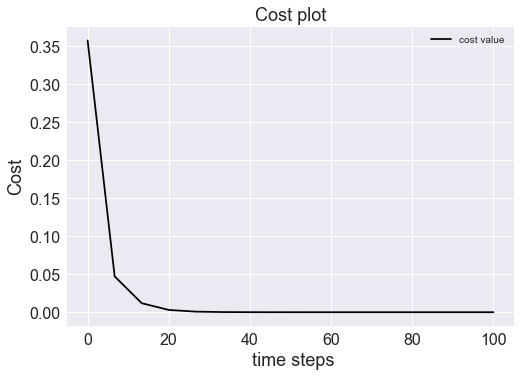

In [59]:
x=np.linspace(0,100,len(cost_arr))
y=cost_arr
plt.style.use("seaborn")
plt.plot(x,y,"black",label="cost value")
plt.title("Cost plot", fontsize=18)
plt.ylabel("Cost", fontsize=18)
plt.xlabel(" time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.legend()
plt.show()

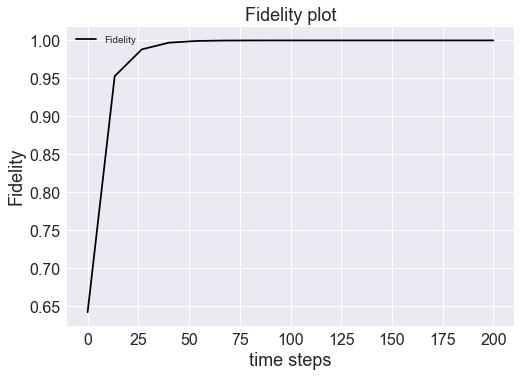

In [60]:
fidelity=[]
for elements in cost_arr:
    fidelity.append(1-elements)
    
fidelity
x=np.linspace(0,200,len(cost_arr))
y=fidelity
plt.plot(x,y,"black",label="Fidelity")
plt.title("Fidelity plot", fontsize=18)
plt.ylabel("Fidelity", fontsize=18)
plt.xlabel("time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.legend()
plt.show()

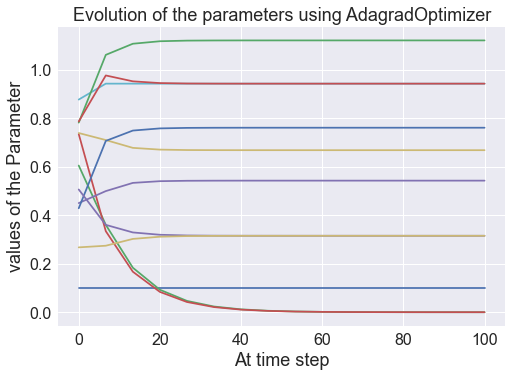

In [61]:
x=np.linspace(0,100,len(cost_arr))
y=params_arr
plt.plot(x,y)
plt.ylabel("values of the Parameter", fontsize=18)
plt.xlabel("At time step", fontsize=18)
plt.title("Evolution of the parameters using AdagradOptimizer", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.legend()
plt.show()

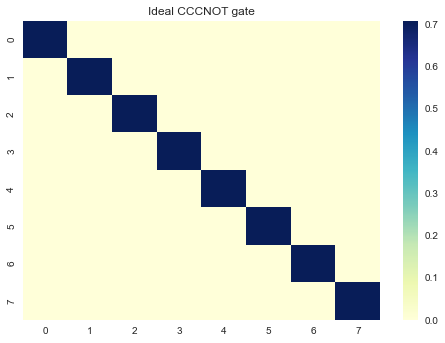

In [62]:
import seaborn
seaborn.heatmap(np.real(U),cmap="YlGnBu")
plt.title("Ideal CCCNOT gate")
plt.show()

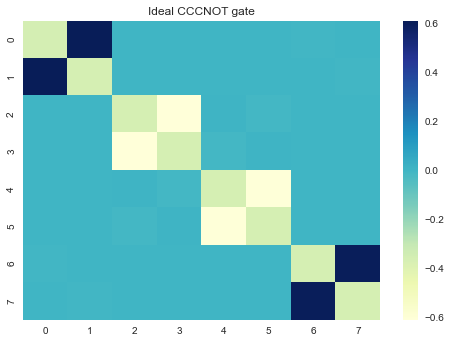

In [63]:
import seaborn
seaborn.heatmap(np.real(hamiltonian_matrix(params_arr[len(params_arr)-1]*trotter_steps/2)),cmap="YlGnBu")
plt.title("Ideal CCCNOT gate")
plt.show()

In [32]:
import orqviz

In [33]:
final_params=params_arr[len(params_arr)-1]

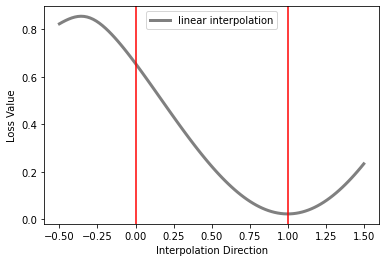

In [34]:
from orqviz.scans import perform_1D_interpolation, plot_1D_interpolation_result
end_points = (-0.5, 1.5)

interpolation_result = perform_1D_interpolation(params, final_params, 
                                                cost1, end_points=end_points)

plot_1D_interpolation_result(interpolation_result, label="linear interpolation", color="gray")

plt.legend()
plt.show()

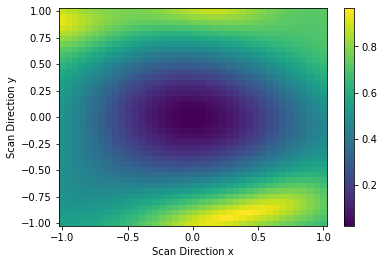

In [35]:
from orqviz.scans import perform_2D_scan, plot_2D_scan_result
from orqviz.geometric import (
    relative_periodic_wrap, 
    relative_periodic_trajectory_wrap, 
    get_random_normal_vector,
    get_random_orthonormal_vector,
)
dir1 = orqviz.geometric.get_random_normal_vector(len(params))
dir2 = orqviz.geometric.get_random_orthonormal_vector(dir1)

scan2D_result = orqviz.scans.perform_2D_scan(final_params, cost1,
                                direction_x=dir1, direction_y=dir2,
                                n_steps_x=40)
orqviz.scans.plot_2D_scan_result(scan2D_result)

In [36]:
from orqviz.pca import (get_pca, perform_2D_pca_scan, plot_pca_landscape, 
                        plot_optimization_trajectory_on_pca)

In [37]:
pca = get_pca(params_arr)
scan_pca_result = perform_2D_pca_scan(pca, cost1, n_steps_x=40)

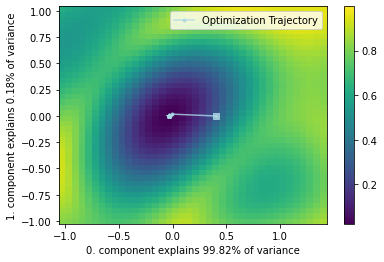

In [38]:
fig, ax = plt.subplots()
plot_pca_landscape(scan_pca_result, pca, fig=fig, ax=ax)
plot_optimization_trajectory_on_pca(params_arr, pca, ax=ax, 
                                    label="Optimization Trajectory", color="lightblue")
plt.legend()
plt.show()

In [39]:
scan_pca_result2 = perform_2D_pca_scan(pca, cost1, n_steps_x=100, offset=12)

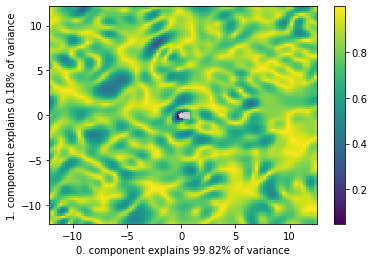

In [40]:
fig, ax = plt.subplots()
plot_pca_landscape(scan_pca_result2, pca, fig=fig, ax=ax)
plot_optimization_trajectory_on_pca(params_arr, pca, ax=ax)